In [19]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

import skimage
from skimage import io
import glob

import sklearn
from scipy.ndimage import gaussian_filter

## First I will do background segmentation to ensure which is fatty and which is dense

In [20]:
## Reading in two mammo images:
dense = io.imread('dense/mdb003.pgm')
fatty = io.imread('fatty/mdb005.pgm')

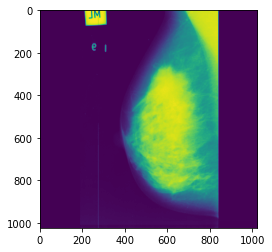

In [21]:
plt.imshow(dense)

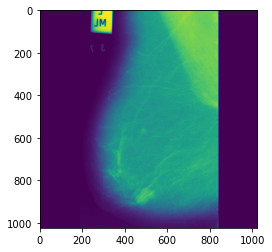

In [22]:
plt.imshow(fatty)

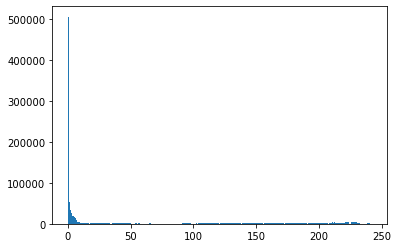

In [23]:
x = plt.hist(dense.ravel(),bins=256)

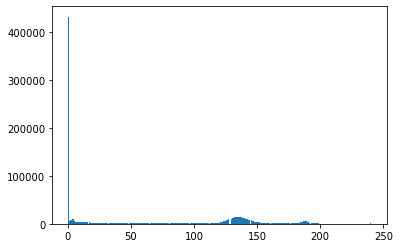

In [24]:
x = plt.hist(fatty.ravel(),bins=256)

In [25]:
## Now, I will be experimenting with different cut-off intensity thresholds to try to separate the background of the image

thresh = 50

dense_bin = (dense > thresh) * 255
fatty_bin = (fatty > thresh) * 255

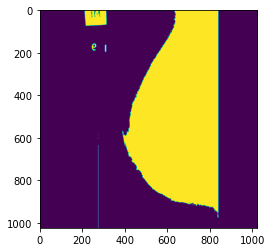

In [26]:
## I will now Visualise the binarized images to see if the threshold I chose separates the breast tissue from the background
plt.imshow(dense_bin)

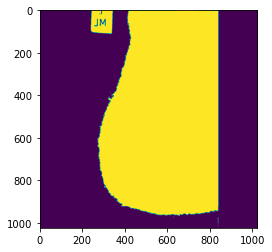

In [27]:
plt.imshow(fatty_bin)

## Now I have chosen my value of thresh, I wil use it to see if I can classify dense v. fatty breast tissue:


In [28]:
thresh = 50

fatty_imgs = glob.glob("fatty/*")
dense_imgs = glob.glob("dense/*")


In [29]:
fatty_intensities = []

for i in fatty_imgs:

    img = plt.imread(i)
    img_mask = (img > thresh)
    fatty_intensities.extend(img[img_mask].tolist())


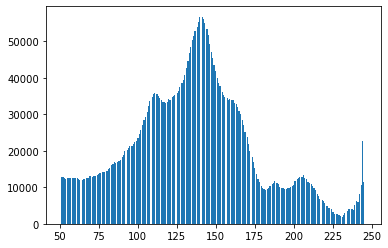

In [30]:
x = plt.hist(fatty_intensities,bins=256)


In [31]:
dense_intensities = []

for i in dense_imgs:

    img = plt.imread(i)
    img_mask = (img > thresh)
    dense_intensities.extend(img[img_mask].tolist())


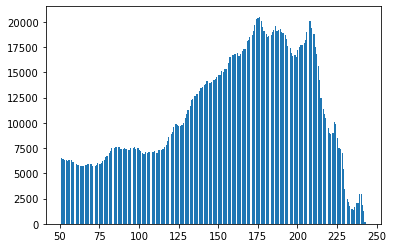

In [32]:
x = plt.hist(dense_intensities,bins=256)


In [33]:
scipy.stats.mode(fatty_intensities)[0][0]


140

In [34]:
scipy.stats.mode(dense_intensities)[0][0]

176

In [ ]:
for i in fatty_imgs:

    img = plt.imread(i)
    img_mask = (img > thresh)

    fatty_delta = scipy.stats.mode(img[img_mask])[0][0] - scipy.stats.mode(fatty_intensities)[0][0]
    dense_delta = scipy.stats.mode(img[img_mask])[0][0] - scipy.stats.mode(dense_intensities)[0][0]

    if (np.abs(fatty_delta) < np.abs(dense_delta)):
        print("Fatty")
    else:
        print("Dense")


In [ ]:
for i in dense_imgs:

    img = plt.imread(i)
    img_mask = (img > thresh)

    fatty_delta = scipy.stats.mode(img[img_mask])[0][0] - scipy.stats.mode(fatty_intensities)[0][0]
    dense_delta = scipy.stats.mode(img[img_mask])[0][0] - scipy.stats.mode(dense_intensities)[0][0]

    if (np.abs(fatty_delta) < np.abs(dense_delta)):
        print("Fatty")
    else:
        print("Dense")



Just by using this method, I was able to get 100% accuracy on dense images and 70% accuracy on fatty images!

